## 実践演習11-3

scikit-learn付属のirisデータからpetallength（2次元目）とpetalwidth（3次元目）特徴を抜き出して2次元教師なしデータを作成し、クラスタリングを行います。

ライブラリの読み込み

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

(1)データの読み込み、(2)2次元目と3次元目の抜き出し、(3)一部の表示 を行います。

In [2]:
iris = load_iris()
X = iris.data[:,2:4]
X[1:10]

array([[1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

正解データのプロット

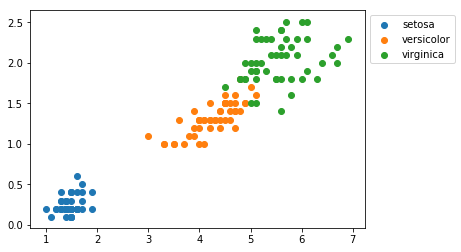

In [3]:
y = iris.target
for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1], label=iris.target_names[t])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理を止めます。

In [4]:
ac=AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000001A14A905BF8>)

acインスタンスのlabels\_属性を表示してクラスタリング結果を確認します。

In [5]:
ac.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

散布図をプロットして結果を確認します。

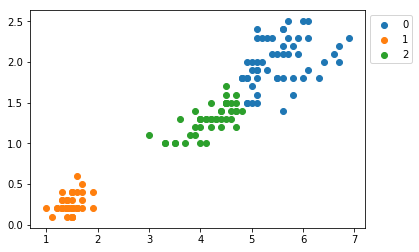

In [6]:
y = ac.labels_
for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数3は予め与えておく必要があります。

In [7]:
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

kmインスタンスのlabels\_属性を表示してクラスタリング結果を確認します。

In [8]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

散布図をプロットして結果を確認します。

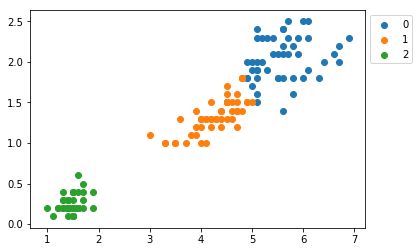

In [9]:
y = km.labels_
for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### クラスタ数決定の自動化 Affinity Propagation

 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [10]:
ap=AffinityPropagation()
ap.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

apインスタンスのcluster_centers\_属性の値は、クラスタ中心のリストです。


In [11]:
ap.cluster_centers_

array([[1.5, 0.2],
       [4.6, 1.5],
       [3.9, 1.2],
       [6.1, 2.3],
       [5.4, 2.1]])

散布図をプロットして結果を確認します。

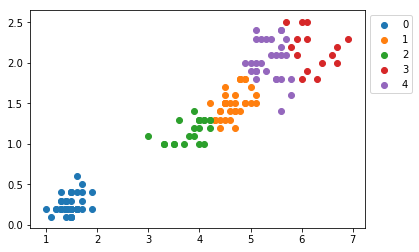

In [12]:
y = ap.labels_
for t in set(y):
    plt.scatter(X[y==t,0], X[y==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数は3としておきます。

In [13]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

各正規分布のパラメータは、gmmインスタンスのmeans\_属性とcovariances\_属性にリスト形式で格納されています。

In [14]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[5.60395923 2.0545418 ]
 [1.46399926 0.24399973]
 [4.32760641 1.36230588]]
covariances:
[[[0.29156635 0.03719346]
  [0.03719346 0.07073705]]

 [[0.02950475 0.00558391]
  [0.00558391 0.01126496]]

 [[0.25410036 0.09152045]
  [0.09152045 0.05088321]]]


結果の表示は[サンプルコード](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)を参考にしてください。

Text(0.5,1,'GMM')

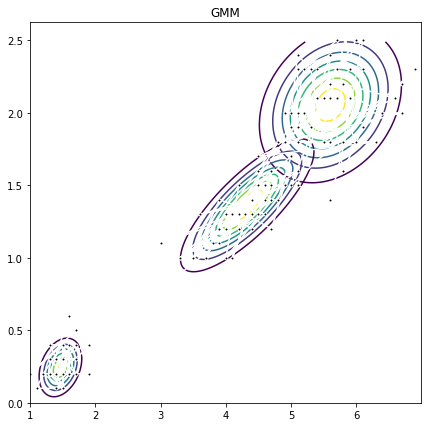

In [15]:
fig = plt.figure(figsize=(7, 7))  #Figureのインスタンス生成
ax = fig.add_subplot(1, 1, 1)     #Axesのインスタンス生成
ax.plot(X[:, 0], X[:, 1], 'w', markerfacecolor='k', marker='.')

x1, x2 = np.mgrid[1:7:.01, 0:2.5:.01]
pos = np.empty(x1.shape + (2,))
pos[:, :, 0] = x1; pos[:, :, 1] = x2
n0 = sp.stats.multivariate_normal(gmm.means_[0], gmm.covariances_[0])
n1 = sp.stats.multivariate_normal(gmm.means_[1], gmm.covariances_[1])
n2 = sp.stats.multivariate_normal(gmm.means_[2], gmm.covariances_[2])
ax.contour(x1, x2, n0.pdf(pos))
ax.contour(x1, x2, n1.pdf(pos))
ax.contour(x1, x2, n2.pdf(pos))
ax.set_title('GMM')